        Company1      Company2  Count      padd
0        Chemist    Programmer     53  3.000000
1      Scientist  Statistician     15  1.173077
2         Worker     Scientist      1  0.500000
3     Accountant  Statistician      2  0.548077
4     Programmer        Worker      4  0.644231
5        Chemist       Chemist     22  1.509615
6      Scientist    Accountant      6  0.740385
7         Worker    Accountant      1  0.500000
8   Statistician  Statistician     15  1.173077
9     Programmer       Chemist     15  1.173077
10       Chemist    Programmer      1  0.500000
11    Accountant     Scientist      1  0.500000
12  Statistician     Scientist      2  0.548077
13     Scientist    Accountant      2  0.548077
14    Accountant    Programmer      4  0.644231
15       Chemist       Chemist      4  0.644231
16     Scientist    Accountant     22  1.509615
17  Statistician     Scientist     22  1.509615
18  Statistician     Scientist      6  0.740385
19    Programmer        Worker      6  0

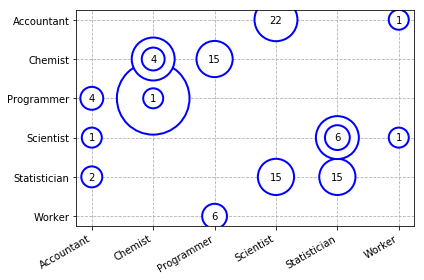

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
df = pd.DataFrame({'Company1':['Chemist', 'Scientist', 'Worker',
                               'Accountant', 'Programmer', 'Chemist',
                              'Scientist', 'Worker', 'Statistician',
                              'Programmer', 'Chemist', 'Accountant', 'Statistician',
                               'Scientist', 'Accountant', 'Chemist',
                              'Scientist', 'Statistician', 'Statistician',
                              'Programmer'],                   
                   'Company2':['Programmer', 'Statistician', 'Scientist',
                               'Statistician', 'Worker', 'Chemist',
                              'Accountant', 'Accountant', 'Statistician',
                              'Chemist', 'Programmer', 'Scientist', 'Scientist',
                               'Accountant', 'Programmer', 'Chemist',
                              'Accountant', 'Scientist', 'Scientist',
                              'Worker'],
                   'Count':[53, 15, 1, 2, 4, 22, 6, 1, 15, 15,
                             1,  1, 2, 2, 4, 4, 22, 22, 6, 6]
                   })
 

# Create padding column from values for circles that are neither too small nor too large
df["padd"] = 2.5 * (df.Count - df.Count.min()) / (df.Count.max() - df.Count.min()) + 0.5  #min max normalization
print(df)
 
fig = plt.figure()
# Prepare the axes for the plot - you can also order your categories at this step
s = plt.scatter(sorted(df.Company1.unique()),
                sorted(df.Company2.unique(), reverse = True), s = 0)
s.remove
# Plot data row-wise as text with circle radius according to Count
for row in df.itertuples():
    bbox_props = dict(boxstyle = "circle, pad = {}".format(row.padd),
                      fc = "w", ec = "b", lw = 2)
    plt.annotate(str(row.Count), xy = (row.Company1, row.Company2),
                 bbox = bbox_props, ha="center", va="center", zorder = 2,
                 clip_on = True)
 
# Plot grid behind markers
plt.grid(ls = "--", zorder = 1)
 
# Take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.show()